In [613]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading...

In [614]:
df_land = pd.read_csv('data/land_areas_of_sri_lanka.csv')
df_ppl = pd.read_csv('data/population_2012_2.csv')
df_ltrc_15_24 = pd.read_csv('data/literacy_rate_by_age_group_15__24__0.csv')
df_ltrc_15_abv = pd.read_csv('data/literacy_rate_by_age_15_&_above.csv', names=['Province', 'District', 'TotalLit15Abv'])

# df_land.head()
# df_ppl.head()
# df_ltrc_15_24.head()
# print(df_ltrc_15_abv.head())

print(df_ppl.columns)
print(df_ltrc_15_24.columns)
print(df_ltrc_15_abv.columns)

Index(['District\n', '\nTotal number of persons ', '\nMale', '\n\nFemale ',
       '\nLess than 15 years', '\n15 - 59 Years', '\n60 years and over'],
      dtype='object')
Index(['Area', 'District', 'Total', 'Male', 'Female'], dtype='object')
Index(['Province', 'District', 'TotalLit15Abv'], dtype='object')


# Data cleaning...

### Cleaning land data

In [615]:
# Cleaning land data
df_land = df_land.rename(columns={' / District': 'District','Total ': 'Total Area','Land ': 'Land',' Inland waters': 'Inland waters',})
df_land = df_land.dropna()
df_land = df_land.drop('Unnamed: 4', axis=1)

columns_to_clean = ['Total Area', 'Land', 'Inland waters']
for col in columns_to_clean:
    df_land[col] = pd.to_numeric(df_land[col])

df_land = df_land[(df_land['District'] != 'Sri Lanka') & (~df_land['District'].str.contains('Province'))]

df_land.sort_values(by='District', inplace=True)

print(df_land.columns)
print(df_land.head())

Index(['District', 'Total Area', 'Land', 'Inland waters'], dtype='object')
        District  Total Area    Land  Inland waters
21        Ampara      4414.9  4221.9          193.0
27  Anuradhapura      7179.3  6664.3          515.0
30       Badulla      2861.3  2827.3           34.0
20    Batticaloa      2854.3  2610.3          244.0
2        Colombo       698.7   675.7           23.0


### Cleaning population data

In [616]:
# Cleaning population data
df_ppl = df_ppl.rename(columns={'District\n': 'District','\nTotal number of persons ': 'Total Person','\nMale': 'Male','\n\nFemale ': 'Female','\nLess than 15 years': 'Less than 15 years','\n15 - 59 Years': '15 - 59 Years','\n60 years and over': '60 years and over',})
df_ppl = df_ppl.dropna()

columns_to_clean = ['Total Person', 'Male', 'Female', 'Less than 15 years','15 - 59 Years', '60 years and over']
for col in columns_to_clean:
    df_ppl[col] = pd.to_numeric(df_ppl[col])

df_ppl = df_ppl[(df_ppl['District'] != 'Sri Lanka') & (~df_ppl['District'].str.contains('Province'))]

df_ppl.sort_values(by='District', inplace=True)

print(df_ppl.columns)
print(df_ppl.head())

Index(['District', 'Total Person', 'Male', 'Female', 'Less than 15 years',
       '15 - 59 Years', '60 years and over'],
      dtype='object')
        District  Total Person     Male   Female  Less than 15 years  \
15        Ampara        648057   314810   333247              194654   
19  Anuradhapura        856232   419426   436806              236458   
21       Badulla        811758   390316   421442              224802   
14    Batticaloa        525142   250837   274305              164394   
0        Colombo       2309809  1137114  1172695              516741   

    15 - 59 Years  60 years and over  
15         401607              51796  
19         543460              76314  
21         494621              92335  
14         321868              38880  
0         1484820             308248  


### Cleaning literacy data - 15_24

In [617]:

# Cleaning literacy data
df_ltrc_15_24 = df_ltrc_15_24.rename(columns={'Total': 'TotalLit_15_24','Male': 'MaleLit_15_24','Female': 'FemaleLit_15_24',})

df_ltrc_15_24 = df_ltrc_15_24.dropna()

columns_to_clean = ['TotalLit_15_24', 'MaleLit_15_24', 'FemaleLit_15_24']
for col in columns_to_clean:
    df_ltrc_15_24[col] = pd.to_numeric(df_ltrc_15_24[col])

# df_ltrc_15_24 = df_ltrc_15_24[(df_ltrc_15_24['District'] != 'Sri Lanka') & (~df_ltrc_15_24['District'].str.contains('Province'))]
df_ltrc_15_24['District'] = df_ltrc_15_24['District'].str.replace('Aqnuradhapura', 'Anuradhapura').str.replace('Monaragala', 'Moneragala').str.replace('Mullativu', 'Mullaitivu').str.replace('Vavunia', 'Vavuniya')

df_ltrc_15_24.sort_values(by='District', inplace=True)
df_ltrc_15_24 = df_ltrc_15_24.drop('Area', axis=1)

print(df_ltrc_15_24.columns)
print(df_ltrc_15_24.head())

Index(['District', 'TotalLit_15_24', 'MaleLit_15_24', 'FemaleLit_15_24'], dtype='object')
        District  TotalLit_15_24  MaleLit_15_24  FemaleLit_15_24
20        Ampara       98.373504      98.793286        97.960988
26  Anuradhapura       98.209191      99.195047        97.295298
29       Badulla       95.920701      94.939180        96.768753
19    Batticaloa       93.802453      92.315286        95.371666
1        Colombo       98.392035      99.473432        97.115207


### Cleaning literacy data - 15_abv

In [618]:
df_ltrc_15_abv = df_ltrc_15_abv.drop('Province', axis=1)
df_ltrc_15_abv = df_ltrc_15_abv.dropna()

df_ltrc_15_abv['TotalLit15Abv'] = pd.to_numeric(df_ltrc_15_abv['TotalLit15Abv'])

df_ltrc_15_abv = df_ltrc_15_abv[(df_ltrc_15_abv['District'] != 'Total')]

df_ltrc_15_abv['District'] = df_ltrc_15_abv['District'].str.replace('Monaragala', 'Moneragala').str.replace('Mullativu', 'Mullaitivu').str.replace('Vavunia', 'Vavuniya')

df_ltrc_15_abv.sort_values(by='District', inplace=True)

print(df_ltrc_15_abv.columns)
print(df_ltrc_15_abv.head())

Index(['District', 'TotalLit15Abv'], dtype='object')
        District  TotalLit15Abv
20        Ampara      88.606704
26  Anuradhapura      93.442778
29       Badulla      83.198340
19    Batticaloa      80.232105
1        Colombo      95.474876


## Data Visualization...

### Stacked bar chart for Land and Inland Waters by District

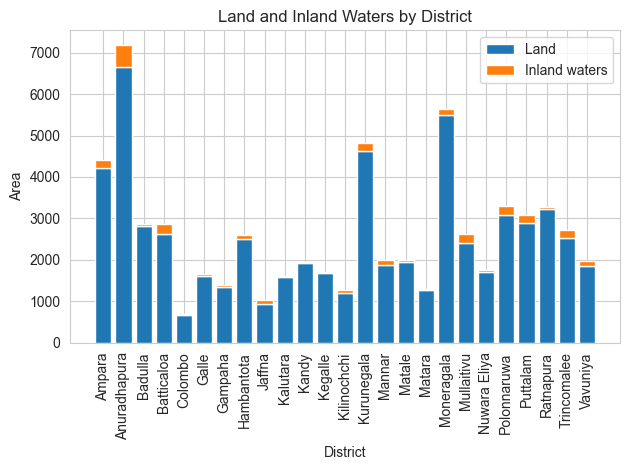

In [619]:
# Create a stacked bar chart for Land and Inland Waters by District
fig, ax = plt.subplots()

# Plotting the 'Land' area
ax.bar(df_land['District'], df_land['Land'], label='Land')

# Stacking the 'Inland waters' on top of 'Land' area
ax.bar(df_land['District'], df_land['Inland waters'], bottom=df_land['Land'], label='Inland waters')

# Adding labels and title
ax.set_xlabel('District')
ax.set_ylabel('Area')
ax.set_title('Land and Inland Waters by District')
ax.legend()

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlapping
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

### Pie chart for Total Land by District

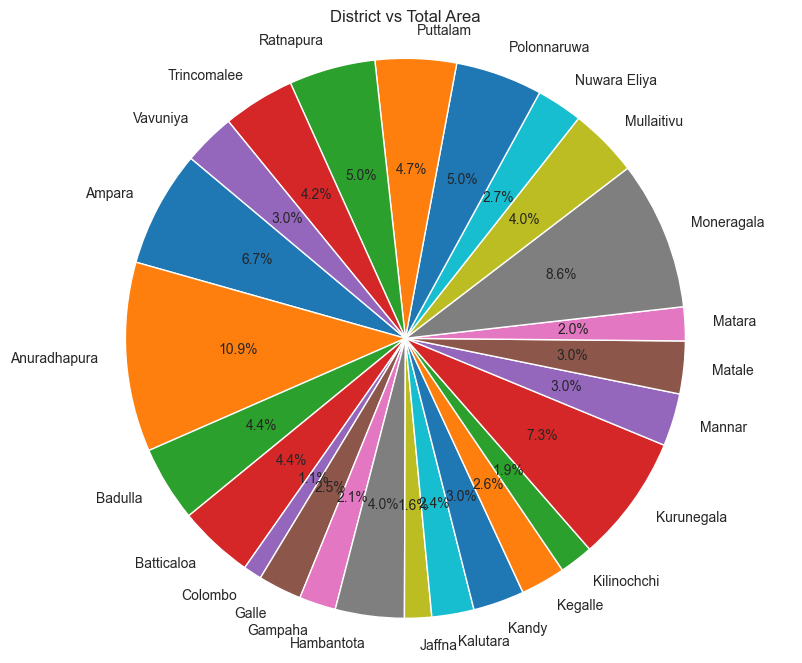

In [620]:
pie_labels = df_land['District']
pie_values = df_land['Total Area']

# Plot
plt.figure(figsize=(10, 8))
plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('District vs Total Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Display or save
plt.show()  # To display the pie chart

### Stacked bar chart for Male and Female count by District

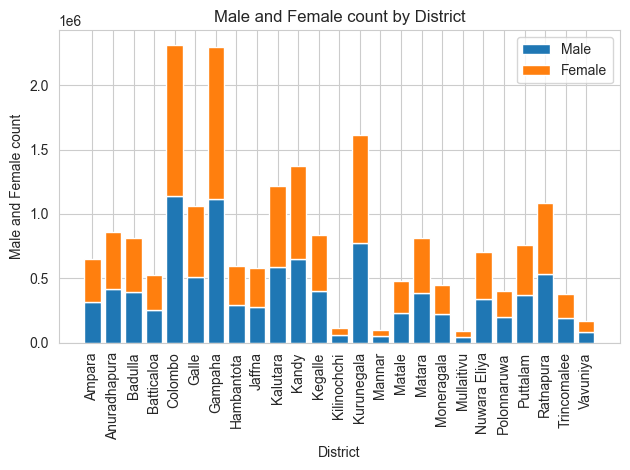

In [621]:

# Create a stacked bar chart for Male and Female count by District
fig, ax = plt.subplots()

# Plotting the 'Land' area
ax.bar(df_ppl['District'], df_ppl['Male'], label='Male')

# Stacking the 'Inland waters' on top of 'Land' area
ax.bar(df_ppl['District'], df_ppl['Female'], bottom=df_ppl['Male'], label='Female')

# Adding labels and title
ax.set_xlabel('District')
ax.set_ylabel('Male and Female count')
ax.set_title('Male and Female count by District')
ax.legend()

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlapping
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


### Stacked bar chart for Male and Female literacy percentage by District

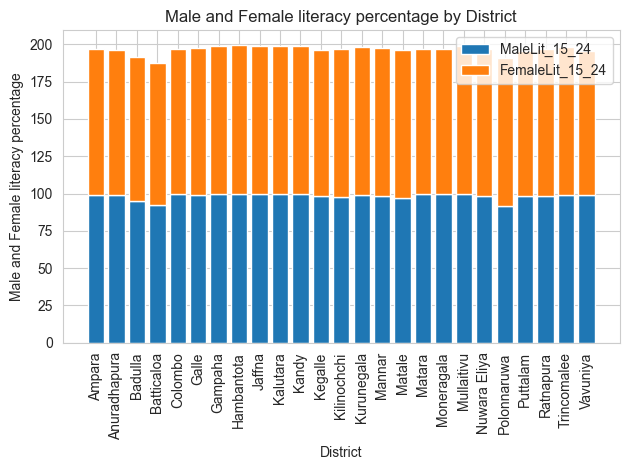

In [622]:
# Create a stacked bar chart for Male and Female literacy percentage by District
fig, ax = plt.subplots()

# Plotting the 'Land' area
ax.bar(df_ltrc_15_24['District'], df_ltrc_15_24['MaleLit_15_24'], label='MaleLit_15_24')

# Stacking the 'Inland waters' on top of 'Land' area
ax.bar(df_ltrc_15_24['District'], df_ltrc_15_24['FemaleLit_15_24'], bottom=df_ltrc_15_24['MaleLit_15_24'], label='FemaleLit_15_24')

# Adding labels and title
ax.set_xlabel('District')
ax.set_ylabel('Male and Female literacy percentage')
ax.set_title('Male and Female literacy percentage by District')
ax.legend()

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlapping
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

## Combining datasets...

In [623]:
combined_df = pd.merge(df_land, df_ppl, on='District', how='outer')
combined_df = pd.merge(combined_df, df_ltrc_15_24, on='District', how='outer')
combined_df = pd.merge(combined_df, df_ltrc_15_abv, on='District', how='outer')
combined_df['Population density'] = (combined_df['Total Person'] / combined_df['Total Area']).round(2)
# print(combined_df.head())
print(combined_df.columns)

Index(['District', 'Total Area', 'Land', 'Inland waters', 'Total Person',
       'Male', 'Female', 'Less than 15 years', '15 - 59 Years',
       '60 years and over', 'TotalLit_15_24', 'MaleLit_15_24',
       'FemaleLit_15_24', 'TotalLit15Abv', 'Population density'],
      dtype='object')


### Visualizing Dictrict wise Total Person, Total Area and Population Density

C:\Users\namal\AppData\Local\Temp\ipykernel_3264\3793332332.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Person', y='District', data=population_dist, ax=ax[0], palette='coolwarm')
C:\Users\namal\AppData\Local\Temp\ipykernel_3264\3793332332.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population density', y='District', data=population_density, ax=ax[2], palette='magma')


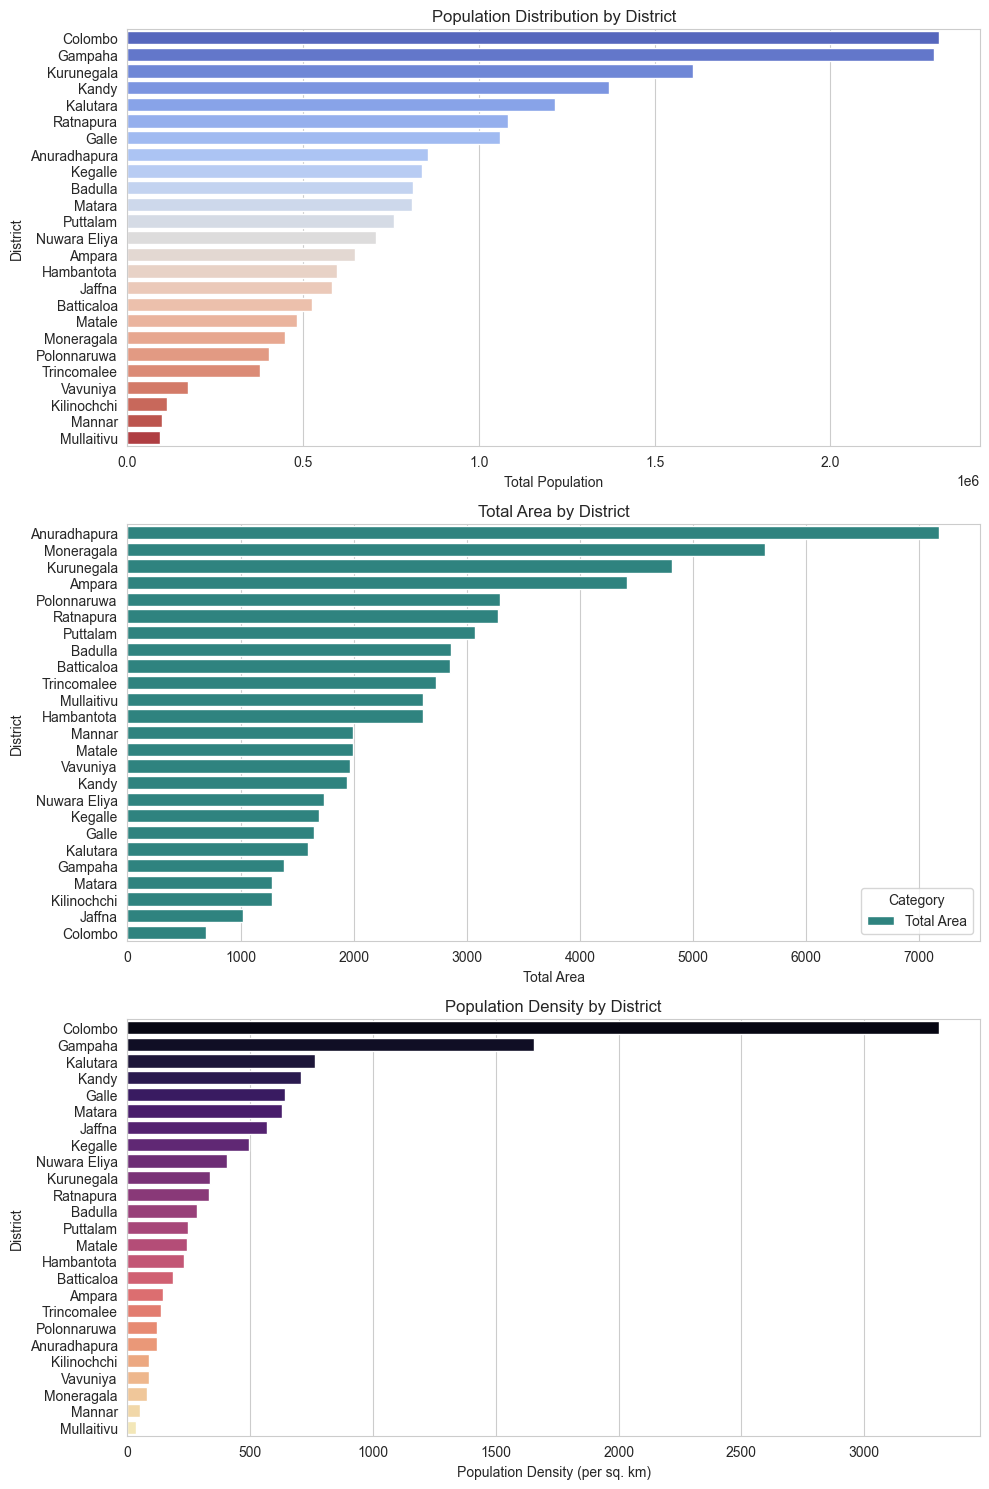

In [624]:
sns.set_style("whitegrid")

# Prepare data for various plots
# Population Distribution by District
population_dist = combined_df[['District', 'Total Person']].sort_values('Total Person', ascending=False)

# Literacy Rates by District
total_area = combined_df[['District', 'Total Area']].sort_values('Total Area', ascending=False)

# Population Density
population_density = combined_df[['District', 'Population density']].sort_values('Population density', ascending=False)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Population Distribution by District
sns.barplot(x='Total Person', y='District', data=population_dist, ax=ax[0], palette='coolwarm')
ax[0].set_title('Population Distribution by District')
ax[0].set_xlabel('Total Population')
ax[0].set_ylabel('District')

# Total Area by District
total_area_melted = total_area.melt(id_vars=["District"], var_name="Category", value_name="TTL_AREA")
sns.barplot(x='TTL_AREA', y='District', hue='Category', data=total_area_melted, ax=ax[1], palette='viridis')
ax[1].set_title('Total Area by District')
ax[1].set_xlabel('Total Area')
ax[1].set_ylabel('District')

# Population Density
sns.barplot(x='Population density', y='District', data=population_density, ax=ax[2], palette='magma')
ax[2].set_title('Population Density by District')
ax[2].set_xlabel('Population Density (per sq. km)')
ax[2].set_ylabel('District')

plt.tight_layout()
plt.show()

### Visualizing Population Density vs Total Literacy Rate

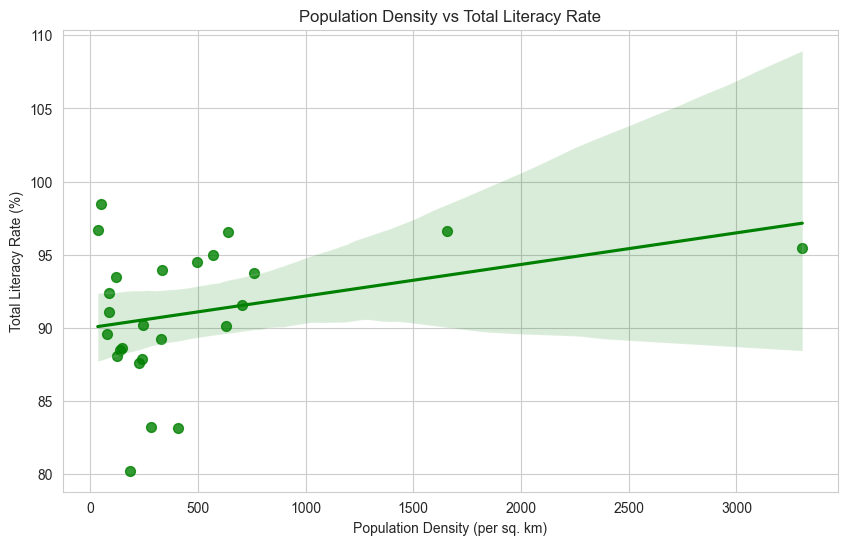

In [625]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population density', y='TotalLit15Abv', data=combined_df, color='green', marker='o', scatter_kws={'s':50})
plt.title('Population Density vs Total Literacy Rate')
plt.xlabel('Population Density (per sq. km)')
plt.ylabel('Total Literacy Rate (%)')
plt.grid(True)
plt.show()

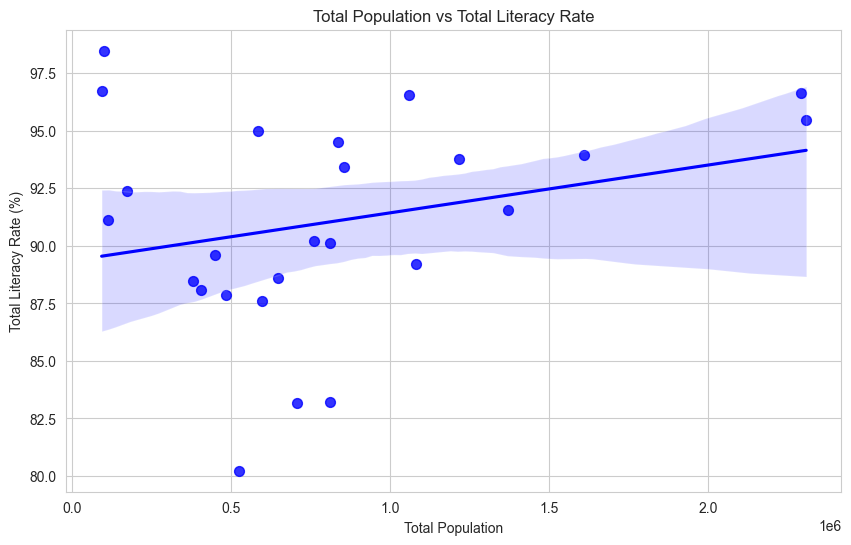

In [626]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Person', y='TotalLit15Abv', data=combined_df, color='blue', marker='o', scatter_kws={'s':50})
plt.title('Total Population vs Total Literacy Rate')
plt.xlabel('Total Population')
plt.ylabel('Total Literacy Rate (%)')
plt.grid(True)
plt.show()

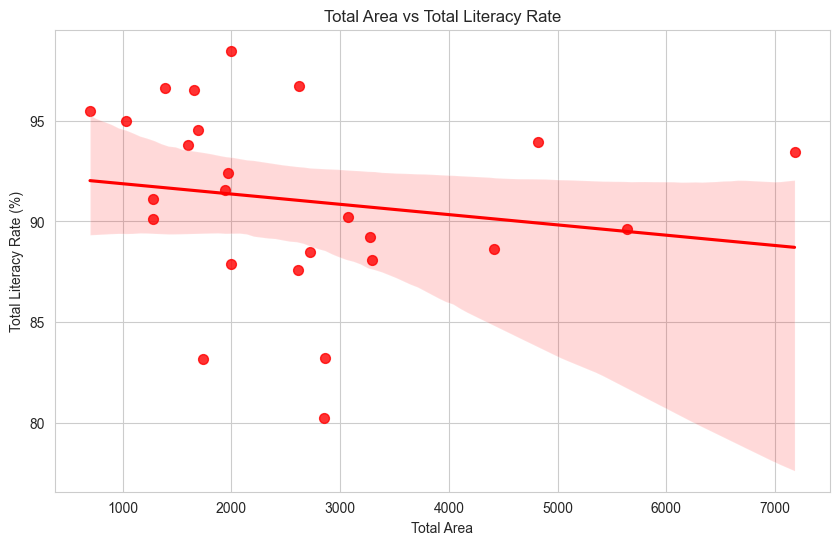

In [627]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Area', y='TotalLit15Abv', data=combined_df, color='red', marker='o', scatter_kws={'s':50})
plt.title('Total Area vs Total Literacy Rate')
plt.xlabel('Total Area')
plt.ylabel('Total Literacy Rate (%)')
plt.grid(True)
plt.show()

## Exporting CSVs...

In [628]:
df_land.to_csv('data/cleaned/land_areas_of_sri_lanka_cleaned.csv', index=False)
df_ppl.to_csv('data/cleaned/population_2012_2_cleaned.csv', index=False)
df_ltrc_15_24.to_csv('data/cleaned/literacy_rate_by_age_group_15__24__0.csv', index=False)
df_ltrc_15_abv.to_csv('data/cleaned/literacy_rate_by_age_15_&_above.csv', index=False)
combined_df.to_csv('data/cleaned/combined.csv', index=False)


Population Data Set